








# Regression models practice

The sense of this notebook is to try all learned regression models on data and choose the best one. The data set is about students and their social, demographic, school related features and grades, the dependent variable is G3 - final grade.

The data set was taken from UCI ML Repository https://archive.ics.uci.edu/ml/datasets/Student+Performance
There are two data sets - grades in Math and Portuguese language and they have some identical students. I decided use only first dataset because it will be enough.


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [3]:
dataset = pd.read_csv('student-mat.csv', sep=';')


In [4]:
dataset

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

# Data Preprocessing

We need to analyze data on missing values and categorical variables. 

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title="Pandas Profiling Report")

In [6]:
profile

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see there is no missing values but few categorical variables. 
It is better to use OneHotEncoder for Mjob, Fjob, reason, guardian, they have unordered values.
And OrdinalEncoder for binary values: sex, address, famsize, pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic 

# Encoding categorical data

Label Encoding

In [7]:
from sklearn.preprocessing import OrdinalEncoder
labeled_set  = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 
         'activities', 'nursery', 'higher', 'internet', 'romantic']
enc = OrdinalEncoder()
enc.fit(dataset[labeled_set])
dataset[labeled_set] = enc.transform(dataset[labeled_set])

In [8]:
columns = dataset.columns.tolist()
del columns[8:12]

One Hot Encoding

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 10, 11])], remainder='passthrough') #drop='first'
new_columns = ['Mjob1', 'Mjob2', 'Mjob3', 'Mjob4', 'Mjob5', 'Fjob1', 'Fjob2', 'Fjob3', 'Fjob4', 'Fjob5', 
               'reason1', 'reason2', 'reason3', 'reason4', 'guardian1', 'guardian2', 'guardian3'] + columns
len(new_columns)
prepared_dataset = pd.DataFrame(np.array(ct.fit_transform(dataset)), columns = new_columns)

In [10]:
prepared_dataset.iloc[:5, :21]

Mjob1  Mjob2  Mjob3  Mjob4  Mjob5  Fjob1  Fjob2  Fjob3  Fjob4  Fjob5  ...  \
0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0  ...   
1    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0  ...   
2    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0  ...   
3    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
4    0.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0  ...   

   reason2  reason3  reason4  guardian1  guardian2  guardian3  school  sex  \
0      0.0      0.0      0.0        0.0        1.0        0.0     0.0  0.0   
1      0.0      0.0      0.0        1.0        0.0        0.0     0.0  0.0   
2      0.0      1.0      0.0        0.0        1.0        0.0     0.0  0.0   
3      1.0      0.0      0.0        0.0        1.0        0.0     0.0  0.0   
4      1.0      0.0      0.0        1.0        0.0        0.0     0.0  0.0   

    age  address  
0  18.0      1.0  
1  17.0      1.0  
2  15.0      1.0  
3  15.0      1.0  
4  16.0      1.0  

[5 rows x 21 columns]

# Splitting the dataset into the Training set and Test set

In [11]:
X = prepared_dataset.iloc[:, :-1].values
y = prepared_dataset.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Multiple linear regression

 Training model

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [14]:
y_pred = lin_reg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.788132132115856

In [16]:
n_observations = list(range(1, len(y_pred)+1))
comparising = pd.DataFrame({"y_test": np.array(y_test), "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

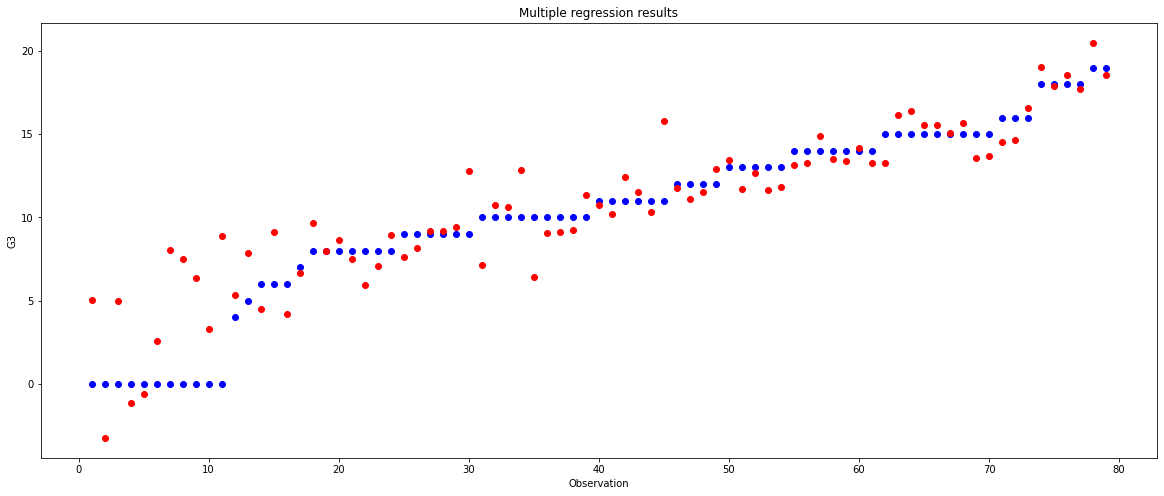

In [17]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Multiple regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

So, accuracy is ok, but we need a higher one to be sure of the strength of our model. Hope it is not the best accuracy that we can have

# Polynomial Regression

 Training model

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_feature = PolynomialFeatures(degree = 2)
X_poly = poly_feature.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

Predicting the Test set results

In [19]:
y_pred = poly_reg.predict(poly_feature.transform(X_test))

In [20]:
r2_score(y_test, y_pred)

-0.8028565108659718

In [21]:
comparising = pd.DataFrame({"y_test": np.array(y_test), "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

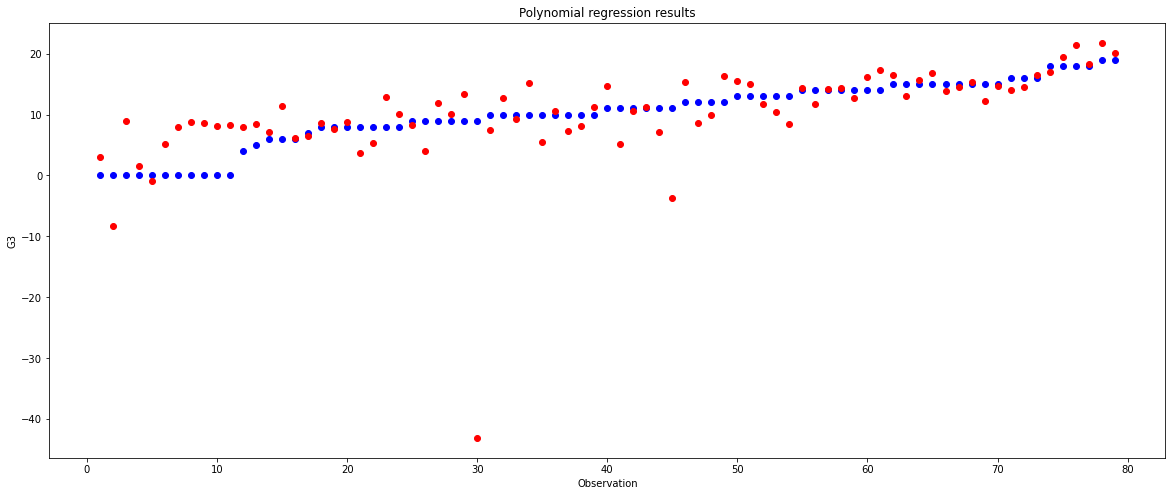

In [22]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Polynomial regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

So Polynomial Regression is so bad here, accuracy is less than 0 on different degree of model, it can be because of small data set or it is just not a case of polynomial 

# Support Vector Regression (SVR)

for this model we should use feature scaling for better result

In [23]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_y_train = sc_y.fit_transform(y_train) 

Training models with different kernel paramater (linear and rbf)

In [25]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear')
rbf_svr_reg = SVR(kernel = 'rbf') # 'linear' 'rbf'
svr_reg.fit(sc_X_train, sc_y_train.ravel())
rbf_svr_reg.fit(sc_X_train, sc_y_train.ravel())

SVR()

test set wasn't scaled with train set due to imitating new real observations

Predicting the Test set results for linear svr

In [26]:
y_pred = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))

In [27]:
r2_score(y_test, y_pred)

0.7894197170588445

In [28]:
y_test = y_test.ravel()
y_train = y_train.ravel()

In [29]:
comparising = pd.DataFrame({"y_test": np.array(y_test),
                            "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

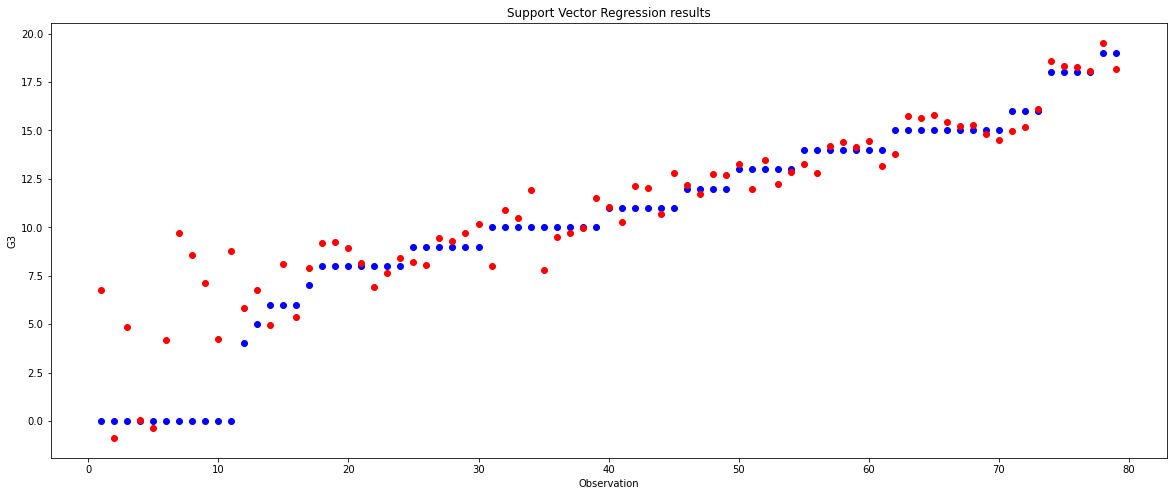

In [30]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Support Vector Regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

Predicting the Test set results for non-linear SVR

In [31]:
y_pred = sc_y.inverse_transform(rbf_svr_reg.predict(sc_X.transform(X_test)))

In [32]:
r2_score(y_test, y_pred)

0.6479841306910998

In [33]:
y_test = y_test.ravel()
y_train = y_train.ravel()

In [34]:
comparising = pd.DataFrame({"y_test": np.array(y_test),
                            "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

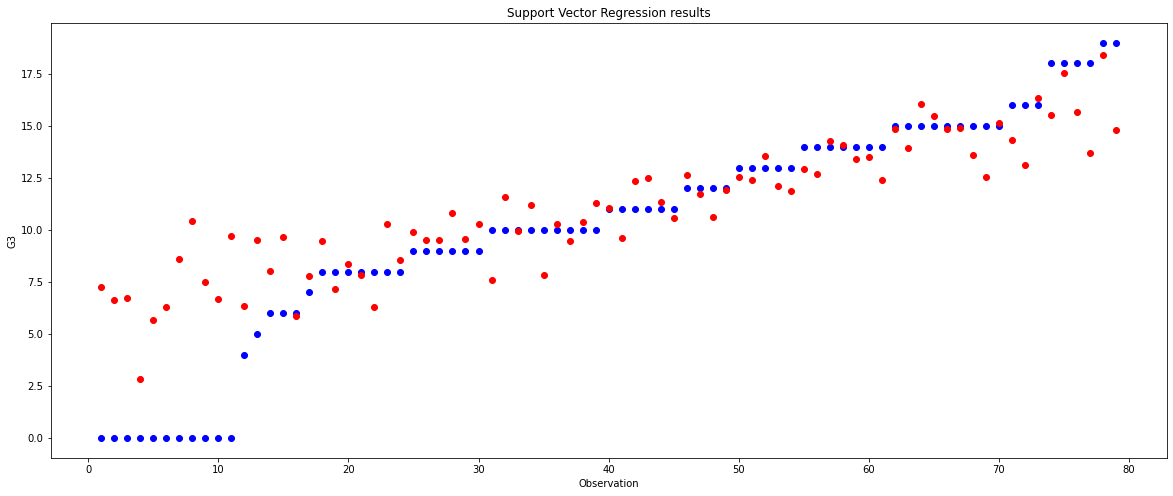

In [35]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Support Vector Regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

As we can see linear model gave us little better result than Multiple Regressin and more better one than rbf kernel, so we can assume that data most likely has a linear relationships than non-linear.
Now, let's check what will be without scaling features.

Training SVR model without feature scaling and predicting results on test set

In [36]:
svr_reg = SVR(kernel = 'linear')
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)
r2_score(y_test, y_pred)

0.7792839356622492

As we can see accuracy became a little smaller, so scaling make sense.

# Decision Tree Regression

 Training model

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Predicting the Test set results

In [38]:
y_pred = tree_reg.predict(X_test)

In [39]:
r2_score(y_test, y_pred)

0.741686122823524

In [40]:
comparising = pd.DataFrame({"y_test": np.array(y_test),
                            "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

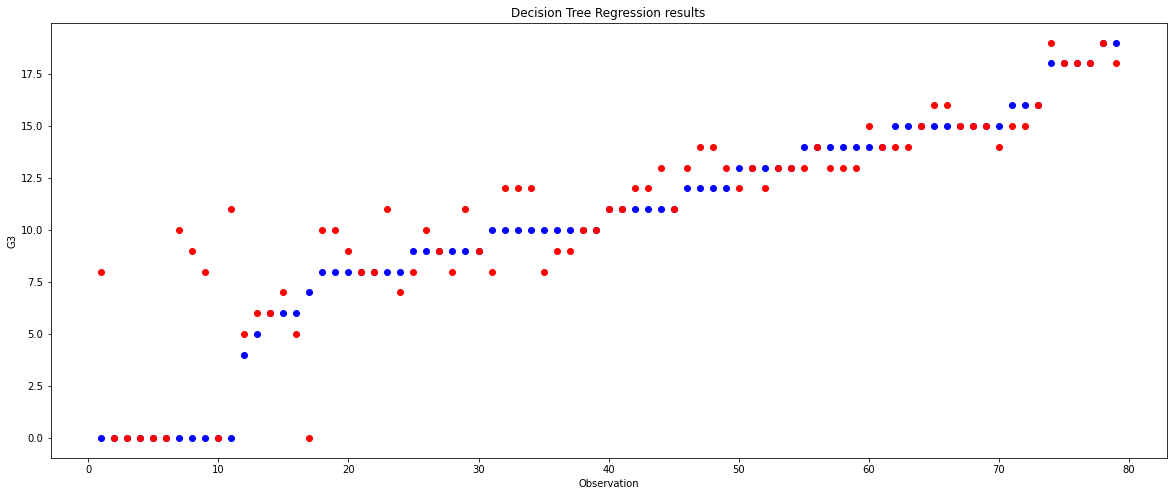

In [41]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Decision Tree Regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

In [42]:
# for showing steps of making predictions
from sklearn import tree
text_representation = tree.export_text(tree_reg)
#print(text_representation)

Decision Tree Regression it can be because of small data set, trees have poor results on them.

# Random Forest Regression

 Training model

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 12, random_state = 0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=12, random_state=0)

Predicting the Test set results

In [44]:
y_pred = forest_reg.predict(X_test)

In [45]:
r2_score(y_test, y_pred)

0.8552560339898738

In [46]:
comparising = pd.DataFrame({"y_test": np.array(y_test),
                            "y_pred": np.array(y_pred)})
comparising = comparising.sort_values(by = ['y_test'])

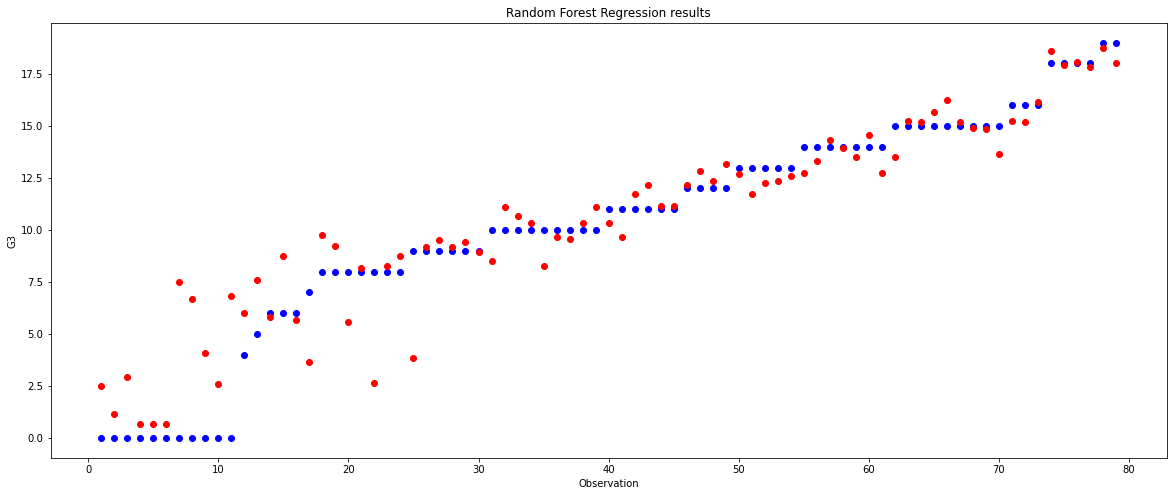

In [47]:
plt.figure(figsize=(20, 8))
plt.scatter(n_observations, comparising['y_test'], color = 'blue')
plt.scatter(n_observations, comparising['y_pred'], color = 'red')
plt.title('Random Forest Regression results')
plt.ylabel('G3')
plt.xlabel('Observation')
plt.show()

And finally, it beated all previous models and not a little! As we know Random forest models have good accuracy on both linear and non linear problems and it worked even on small data set, great.

According to sklearn recommendations for choosing best model https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
we should use for this data set Lasso or ElasticNet - model with regularizaation which prevent overfitting? so let's do it and compare results with previous ones.

Training models

In [48]:
from sklearn.linear_model import Lasso, ElasticNet
lasso = Lasso(alpha=0.05)
enet = ElasticNet(alpha=0.05)
lasso.fit(sc_X_train, sc_y_train)
enet.fit(sc_X_train, sc_y_train)

ElasticNet(alpha=0.05)

Evaluating the Models Performance

In [49]:
r2_score(y_test, lasso.predict(sc_y.inverse_transform(sc_X.transform(X_test))))

0.7778294860487613

In [50]:
r2_score(y_test, enet.predict(sc_y.inverse_transform(sc_X.transform(X_test))))

0.7917247253740594

So, it didn't beat accuracy of random forest, but we can be sure that these models are not overfitted 

# Cross-validation and GridSearch

And now, I wanna find best hyperparameters for each model using GridSearchCV and compare their accuracy scores and see the contribution of this approach to determining the best model experimentally. After that use XgBoost and Catboost and to see if the beat results of previous models. And finding materials about best metrics in regression tasks recommend using RMSE for evaluating models (in GridSearch they will be negative and the best is lower score, in test set score will be positive and the best is highest score)

Importing libraries

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

The purpose of the cross-validation is to estimate the predictive power, so the validation set should be treated as a temporary unseen test set. The StandardScale should not fit the temporary test set. So I am gonna initialize variables again without standardizing and then in pipeline use StandarderScaler that prevents bias for SVR model

## Multiple linear regression

LinearRegression doesn't have hyperparameters, so I use cross_val_score

In [52]:
accuracies = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print("Best RMSE: {:.2f} ".format(accuracies.mean()))
print("Standard Deviation: {:.2f} ".format(accuracies.std()))

Best RMSE: -1.90 
Standard Deviation: 0.40 


In [53]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(X_test))))

Test set RMSE: 5.85 


## Polynomial Regression 

In [74]:
degrees = [2, 3, 4] 
normalizes = [True, False] 
best_score = -1000
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(X_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=10, scoring = 'neg_root_mean_squared_error') 
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_degree = degree
            best_normalize = normalize

In [75]:
print(best_degree, best_normalize, best_score)

3 True -2.522793292825079


In [73]:
regressor = LinearRegression(normalize = True)
poly_feature = PolynomialFeatures(degree = 3)
X_poly = poly_feature.fit_transform(X_train)
regressor.fit(X_poly, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(poly_feature.transform(X_test)), squared = False)))

Test set RMSE: 3.08 


## Support Vector Regression (SVR)

In [57]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svr', SVR())
])
parameters = [{'svr__C': [0.25, 0.5, 0.75], 'svr__kernel': ['linear']},
              {'svr__C': [0.25, 0.5, 0.75], 'svr__kernel': ['rbf'], 'svr__gamma': [0.1,  0.3,  0.5,  0.7, 0.9]},
             {'svr__C': [0.25, 0.5, 0.75], 'svr__kernel': ['poly'], 'svr__gamma': [0.1,  0.3,  0.5,  0.7, 0.9], 
              'svr__degree': [2, 3, 4, 5, 6, 7], 'svr__coef0': [0, 1, 3, 5]},
             {'svr__C': [0.25, 0.5, 0.75], 'svr__kernel': ['sigmoid'], 'svr__gamma': [0.1,  0.3,  0.5,  0.7, 0.9], 
              'svr__coef0': [0, 1, 3, 5]}]
grid_search = GridSearchCV(estimator =  pipe,
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 0,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best RMSE: {:.2f} ".format(best_accuracy))
print("Best Parameters:", best_parameters)

Best RMSE: -1.80 
Best Parameters: {'svr__C': 0.5, 'svr__kernel': 'linear'}


In [59]:
regressor = SVR(C = 0.5, kernel = 'linear')
regressor.fit(sc_X_train, sc_y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test))), squared = False)))

Test set RMSE: 2.41 


## Decision Tree Regression 

In [60]:
parameters = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}]
grid_search = GridSearchCV(estimator =  DecisionTreeRegressor(random_state = 0),
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best RMSE: {:.2f} ".format(best_accuracy))
print("Best Parameters:", best_parameters)

Best RMSE: -1.86 
Best Parameters: {'criterion': 'friedman_mse'}


In [61]:
regressor = DecisionTreeRegressor(random_state = 0, **best_parameters)
regressor.fit(X_train, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(X_test), squared = False)))

Test set RMSE: 2.67 


## Random Forest Regression 

In [62]:
parameters = [{'n_estimators': [5, 7, 10, 12, 15, 18, 20], 
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}]
grid_search = GridSearchCV(estimator =  RandomForestRegressor( random_state = 0),
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best RMSE: {:.2f} ".format(best_accuracy))
print("Best Parameters:", best_parameters)

Best RMSE: -1.50 
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 18}


In [63]:
regressor = RandomForestRegressor(random_state = 0, **best_parameters)
regressor.fit(X_train, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(X_test), squared = False)))

Test set RMSE: 2.08 


Conclusion. So models with best hyperparameters was found and the best model with RMSE score on training set is Random Forest Regression and on test set RangomForestRegression again. Thanks to these algorithms we can be sure to choose right hyperparameters and carefully evaluate models.

# XgBoost and Catboost

These methods are known for their power in both regression and classification, it is interesting to see if they give the best results. The second should be good for categorical data, but the sample may be small for this algorithm.

In [64]:
from xgboost import XGBRegressor
accuracies = cross_val_score(estimator = XGBRegressor(), X = X_train, y = y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print("Best RMSE: {:.2f} ".format(accuracies.mean()))
print("Standard Deviation: {:.2f} ".format(accuracies.std()))

Best RMSE: -1.42 
Standard Deviation: 0.48 


In [65]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(X_test), squared = False)))

Test set RMSE: 2.00 


In [66]:
from catboost import CatBoostRegressor
accuracies = cross_val_score(estimator = CatBoostRegressor(metric_period = 200), X = X_train, y = y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print("Best RMSE: {:.2f} ".format(accuracies.mean()))
print("Standard Deviation: {:.2f} ".format(accuracies.std()))

Learning rate set to 0.031195
0:	learn: 4.1983067	total: 165ms	remaining: 2m 44s
200:	learn: 0.8020631	total: 877ms	remaining: 3.48s
400:	learn: 0.4671611	total: 1.68s	remaining: 2.5s
600:	learn: 0.2744403	total: 2.4s	remaining: 1.59s
800:	learn: 0.1646785	total: 3.09s	remaining: 767ms
999:	learn: 0.1030667	total: 3.84s	remaining: 0us
Learning rate set to 0.031195
0:	learn: 4.3136686	total: 2.73ms	remaining: 2.73s
200:	learn: 0.8486760	total: 651ms	remaining: 2.58s
400:	learn: 0.4687757	total: 1.43s	remaining: 2.13s
600:	learn: 0.2696486	total: 2.02s	remaining: 1.34s
800:	learn: 0.1660202	total: 2.65s	remaining: 659ms
999:	learn: 0.1078527	total: 3.27s	remaining: 0us
Learning rate set to 0.031195
0:	learn: 4.3788517	total: 2.74ms	remaining: 2.73s
200:	learn: 0.8205918	total: 675ms	remaining: 2.68s
400:	learn: 0.4464658	total: 1.3s	remaining: 1.94s
600:	learn: 0.2641543	total: 1.94s	remaining: 1.29s
800:	learn: 0.1573331	total: 2.6s	remaining: 647ms
999:	learn: 0.0979370	total: 3.25s	re

In [67]:
regressor = CatBoostRegressor(metric_period = 200)
regressor.fit(X_train, y_train)
print("Test set RMSE: {:.2f} ".format(mean_squared_error(y_test, regressor.predict(X_test), squared = False)))

Learning rate set to 0.031794
0:	learn: 4.3179262	total: 2.94ms	remaining: 2.94s
200:	learn: 0.8325698	total: 689ms	remaining: 2.74s
400:	learn: 0.5011190	total: 1.29s	remaining: 1.93s
600:	learn: 0.2949469	total: 1.94s	remaining: 1.28s
800:	learn: 0.1803203	total: 2.59s	remaining: 643ms
999:	learn: 0.1158123	total: 3.26s	remaining: 0us
Test set RMSE: 2.03 


Conclusion. XGBRegressor and CatBoostRegressor have better RMSE on both training and test set than RandomForestRegressor despite the fact that the date set is small. So these algorithms have lived up to their fame in achieving excellent results.